In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb

In [2]:
df = pd.read_csv('/Users/deepbhattacharjee/Documents/Forcasting dataset/PJME_hourly.csv')

In [3]:
df.head()

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [4]:
 df = df.set_index('Datetime')

In [5]:
color_pal= sns.color_palette()

<AxesSubplot: title={'center': 'PJME Enegy used in MW'}, xlabel='Datetime'>

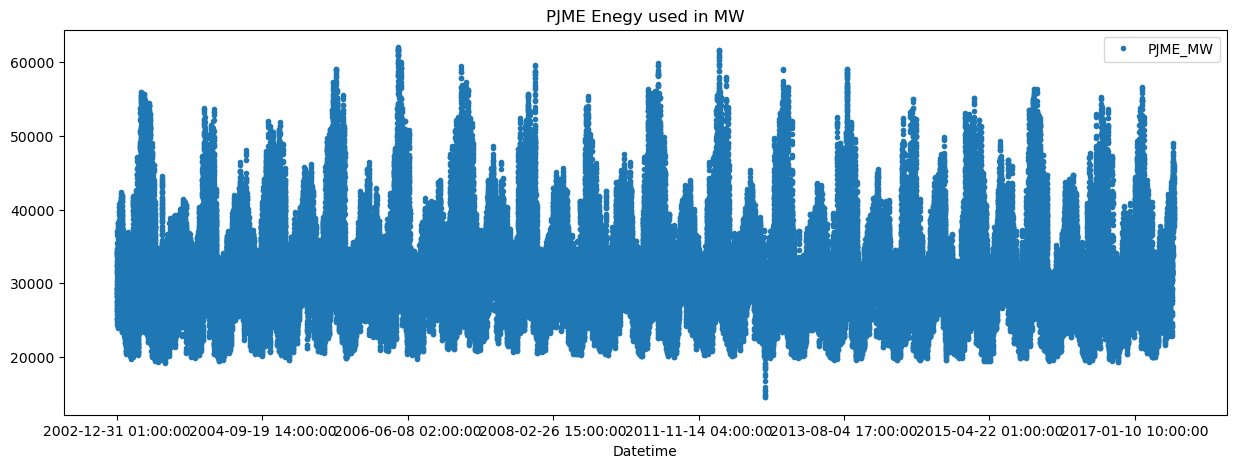

In [6]:
df.plot(style='.' , figsize=(15, 5), color=color_pal[0], title='PJME Enegy used in MW')

In [7]:
df.index=pd.to_datetime(df.index)

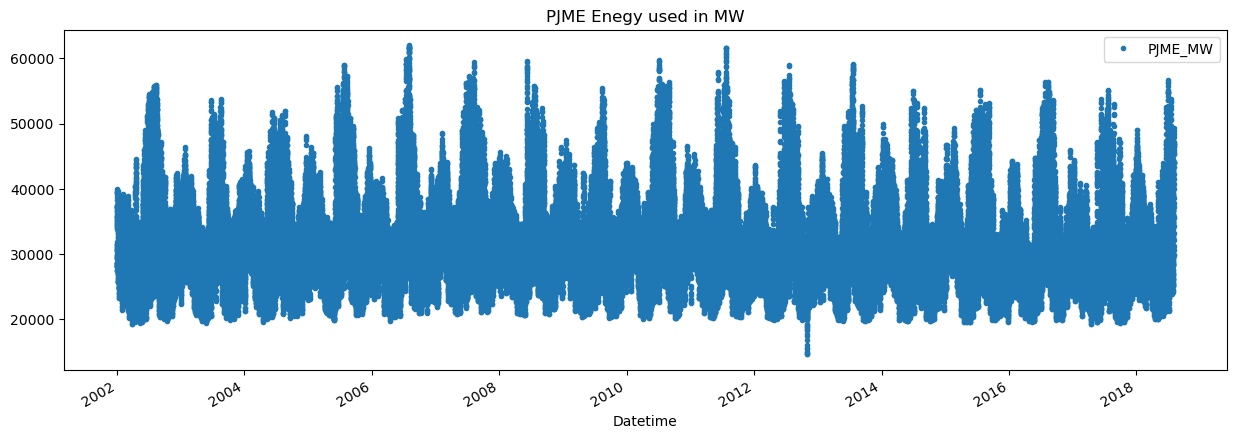

In [8]:
df.plot(style='.' , 
        figsize=(15, 5), 
        color=color_pal[0], 
        title='PJME Enegy used in MW')
plt.show()

# train / test split

In [9]:
train= df.loc[df.index<'01-01-2015']

In [10]:
test = df.loc[df.index>='01-01-2015']

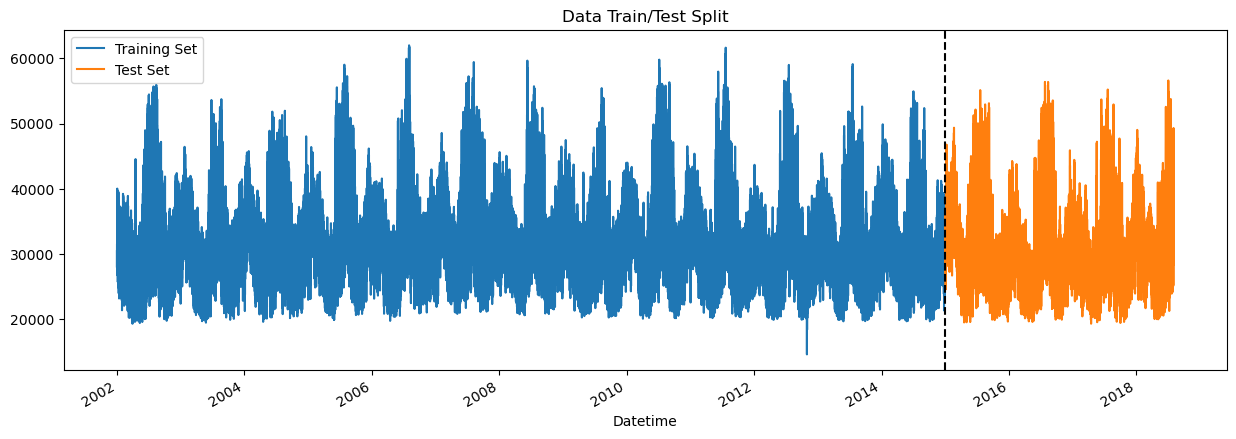

In [11]:
fig, ax =plt.subplots(figsize = (15,5))
train.plot(ax=ax, label= 'Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2015', color='black', ls='--')
ax.legend(['Training Set','Test Set'])
plt.show()

<AxesSubplot: title={'center': 'Week of Data'}, xlabel='Datetime'>

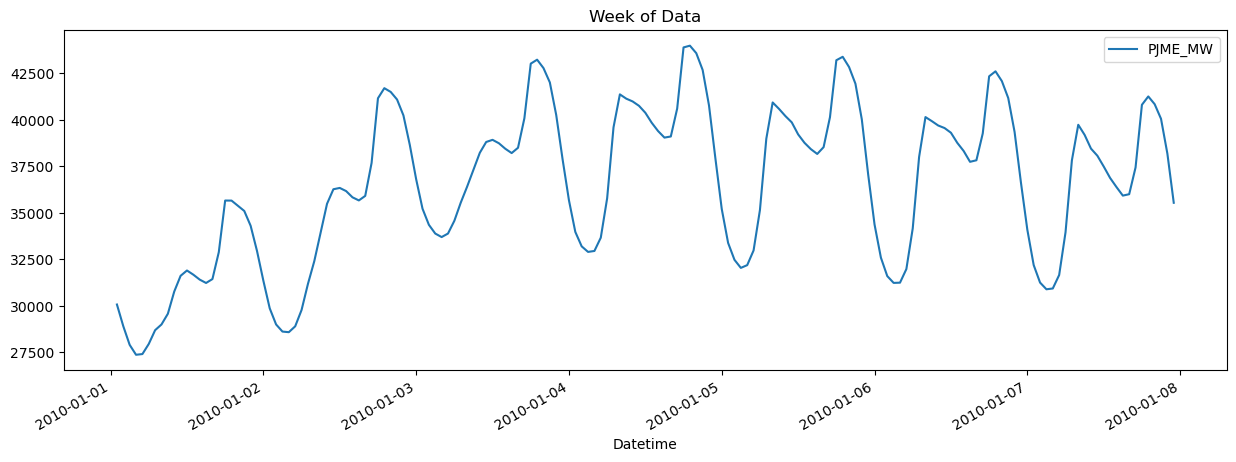

In [12]:
df.loc[(df.index>'01-01-2010') & (df.index <'01-08-2010')].plot(figsize=(15,5), title='Week of Data')


# Feature creation

In [13]:
def create_features(df):
    df['hour']=df.index.hour
    df['dayofweek']=df.index.day_of_week
    df['quarter']=df.index.quarter
    df['month']=df.index.month
    df['year']=df.index.year
    df['day_of_year']=df.index.dayofyear
    return df

df = create_features(df)

# Visualize our Feature/Target Relationship

Text(0.5, 1.0, 'MW by Hour')

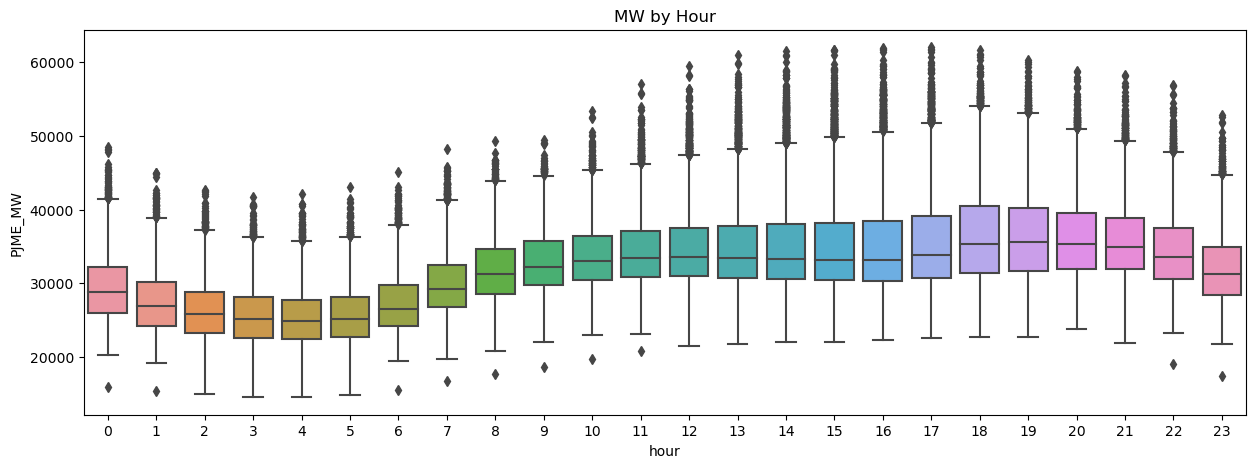

In [14]:
fig, ax=plt.subplots(figsize=(15,5))
sns.boxplot(data=df, x='hour',y='PJME_MW')
ax.set_title('MW by Hour')

Text(0.5, 1.0, 'MW by Month')

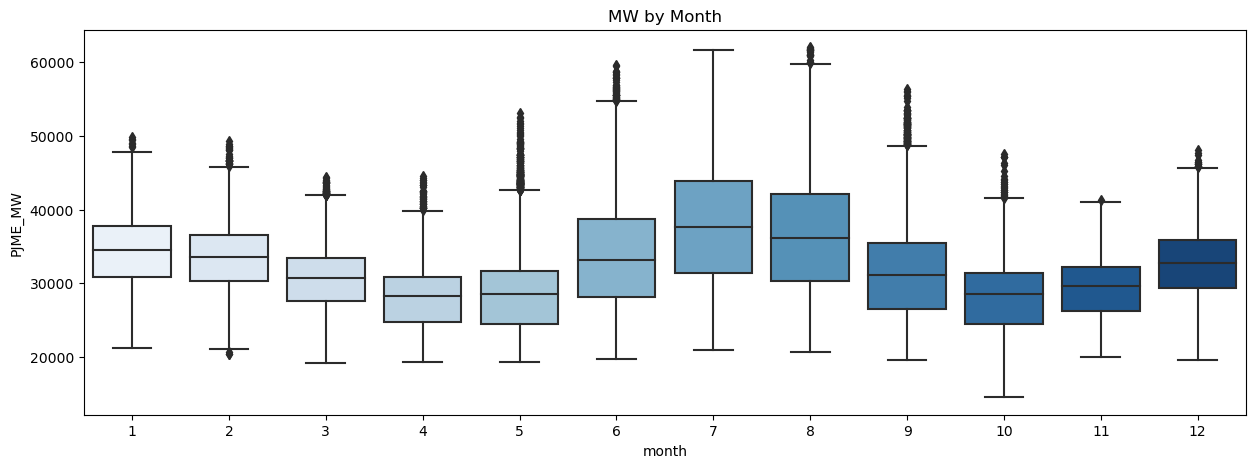

In [15]:
fig, ax=plt.subplots(figsize=(15,5))
sns.boxplot(data=df, x='month',y='PJME_MW', palette='Blues')
ax.set_title('MW by Month')

# Create our Model

In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
train = create_features(train)
test = create_features(test)

/var/folders/q7/4sh3p6bs3z95dmh035hfn9wm0000gn/T/ipykernel_11922/1698388703.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour']=df.index.hour
/var/folders/q7/4sh3p6bs3z95dmh035hfn9wm0000gn/T/ipykernel_11922/1698388703.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dayofweek']=df.index.day_of_week
/var/folders/q7/4sh3p6bs3z95dmh035hfn9wm0000gn/T/ipykernel_11922/1698388703.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [18]:
df.columns

Index(['PJME_MW', 'hour', 'dayofweek', 'quarter', 'month', 'year',
       'day_of_year'],
      dtype='object')

In [19]:
Features=['hour', 'dayofweek', 'quarter', 'month', 'year','day_of_year']
Target=['PJME_MW']

In [20]:
X_train =train [Features]
y_train=train[Target]

In [21]:
X_test =test [Features]
y_test=test[Target]

In [22]:
reg=xgb.XGBRegressor( early_stopping_rounds=1000,learning_rate=0.3)
reg.fit(X_train,y_train,
        eval_set=[(X_train,y_train),(X_test,y_test)],
        verbose=50)

[0]	validation_0-rmse:23192.08347	validation_1-rmse:22262.72116
[50]	validation_0-rmse:2037.83628	validation_1-rmse:4223.15738
[99]	validation_0-rmse:1657.77633	validation_1-rmse:4282.27825


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=1000,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [23]:
fi=pd.DataFrame(data=reg.feature_importances_,
            index=reg.feature_names_in_,
            columns=['importance'])

<AxesSubplot: title={'center': 'Feature Importance'}>

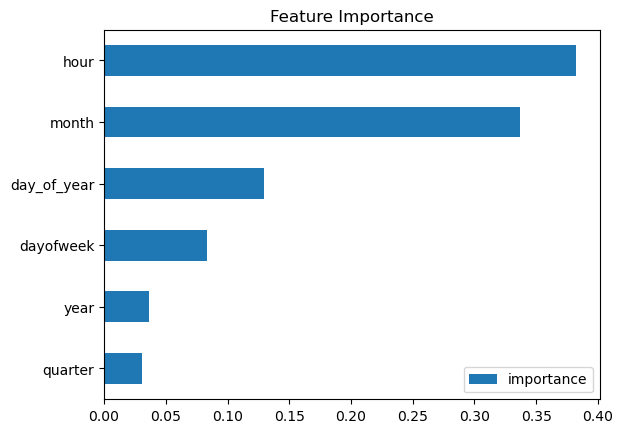

In [24]:
fi.sort_values('importance').plot(kind='barh',title='Feature Importance')

# Forecast on test

/var/folders/q7/4sh3p6bs3z95dmh035hfn9wm0000gn/T/ipykernel_11922/702042350.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = reg.predict(X_test)


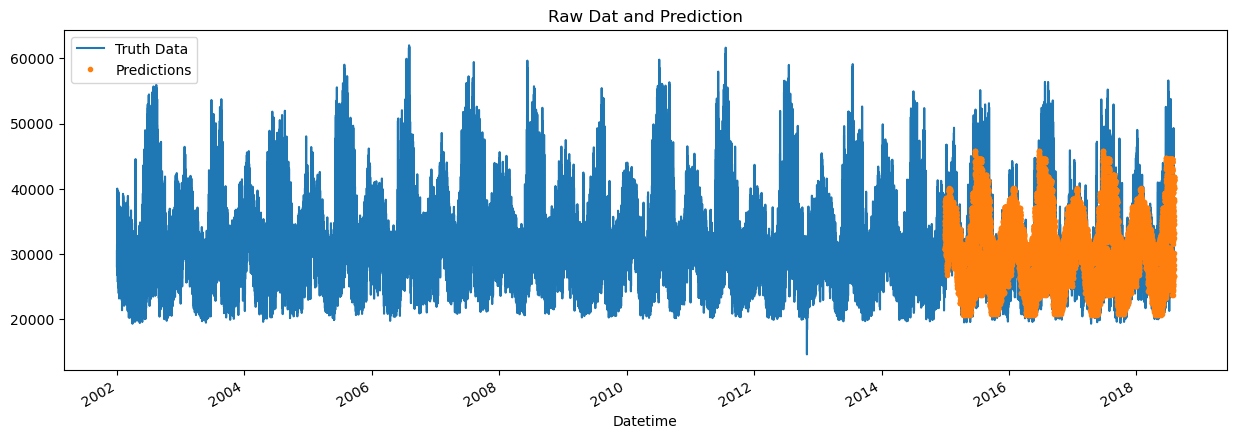

In [25]:
test['prediction'] = reg.predict(X_test)
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = df[['PJME_MW']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

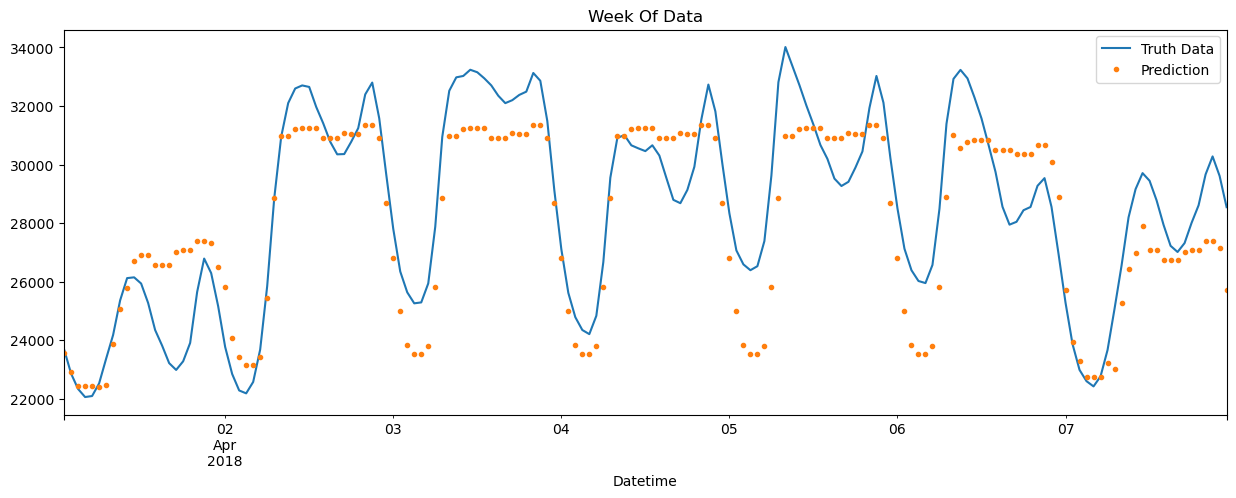

In [26]:
ax = df.loc[(df.index > '04-01-2018') & (df.index < '04-08-2018')]['PJME_MW'] \
    .plot(figsize=(15, 5), title='Week Of Data')
df.loc[(df.index > '04-01-2018') & (df.index < '04-08-2018')]['prediction'] \
    .plot(style='.')
plt.legend(['Truth Data','Prediction'])
plt.show()

In [27]:
score = np.sqrt(mean_squared_error(test['PJME_MW'], test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 3763.35


In [32]:
test['error'] = np.abs(test[Target] - test['prediction'])
test['date'] = test.index.date
test.groupby(['date'])['error'].mean().sort_values(ascending=False).head(5)

/var/folders/q7/4sh3p6bs3z95dmh035hfn9wm0000gn/T/ipykernel_11922/4212677146.py:1: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  test['error'] = np.abs(test[Target] - test['prediction'])


ValueError: cannot reindex on an axis with duplicate labels